1. 株価の時間の変化を見る
2. 日毎の変動を可視化する
3. 移動平均を見る
4. 複数の株価の終値の創刊を計算する
5. 複数の株価の変動の関係を見る
6. 特定の株のリスクを計算する
7. シミュレーションを使った未来の予測

In [6]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from pandas_datareader import DataReader

from datetime import datetime

In [8]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

end = datetime.now()
start = datetime(end.year - 1,end.month, end.day)

for stock in tech_list:
    # それぞれの名前でDataFrameを作る
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [10]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02,250.000000
mean,194.324480,190.407960,192.303800,192.403440,3.184882e+07,191.201346
std,21.555839,21.494869,21.435826,21.497989,1.351437e+07,21.886026
min,145.720001,142.000000,143.979996,142.190002,1.136200e+07,140.505798
25%,175.902496,173.362499,174.737499,174.757500,2.194270e+07,173.279305
50%,198.750000,193.805000,196.364998,196.345001,2.824650e+07,195.165611
75%,209.089996,205.104996,207.449997,207.479996,3.854895e+07,206.476418
max,238.130005,234.880005,236.389999,236.410004,9.574460e+07,236.410004


In [11]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2018-10-22 to 2019-10-18
Data columns (total 6 columns):
High         250 non-null float64
Low          250 non-null float64
Open         250 non-null float64
Close        250 non-null float64
Volume       250 non-null float64
Adj Close    250 non-null float64
dtypes: float64(6)
memory usage: 13.7 KB


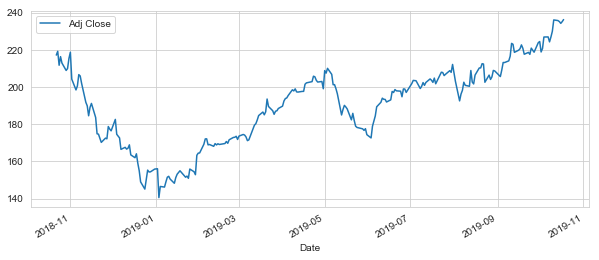

In [12]:
# 終値の時系列をプロット
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

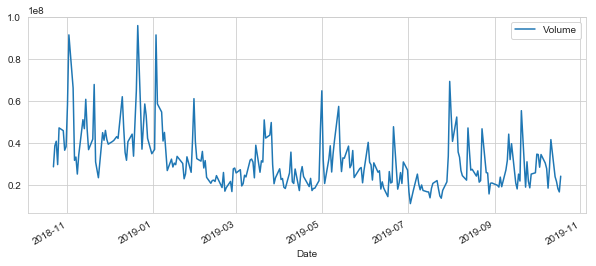

In [13]:
# 出来高(1日に取引が成立した株の数)をプロット
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [17]:
# 間隔ごとに移動平均を描く
ma_day = [10,20,50]

for ma in ma_day:
    column_name = f"MA {ma}"
    AAPL[column_name]=AAPL['Adj Close'].rolling(ma).mean()

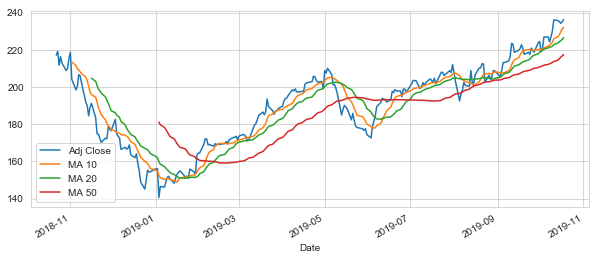

In [18]:
AAPL[['Adj Close','MA 10','MA 20','MA 50']].plot(subplots=False,figsize=(10,4))

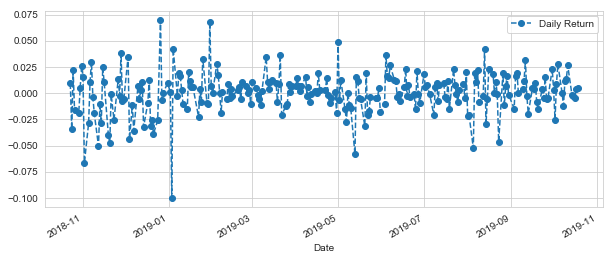

In [19]:
# 日毎の変動
# pct_changeを使うと変化の割合を計算できる
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
# 変化率をプロット
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

/Users/tsubasa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


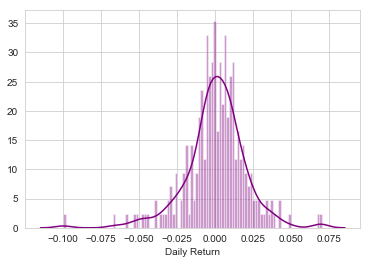

In [20]:
# 前日比(%)のヒストグラムを描く
# NaNを取り除く
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [21]:
# ハイテク4社の株価を1つのDataFrameにまとめる
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [22]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-10-22,217.278320,1789.300049,1101.160034,107.933945
2018-10-23,219.326538,1768.699951,1103.689941,106.427612
2018-10-24,211.803284,1664.199951,1050.709961,100.737038
2018-10-25,216.441330,1782.170044,1095.569946,106.624535
2018-10-26,212.994797,1642.810059,1071.469971,105.305260


In [23]:
# 終値の日毎の変化を計算する
tech_rets = closing_df.pct_change()

/Users/tsubasa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


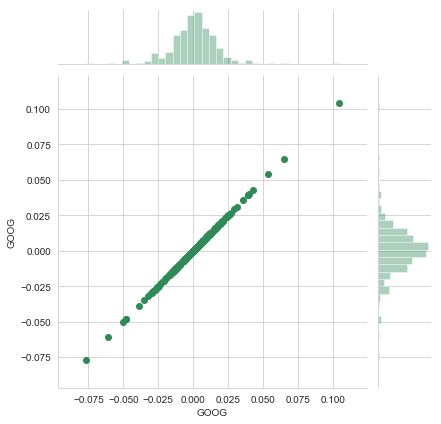

In [25]:
# Google同士の相関
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

/Users/tsubasa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


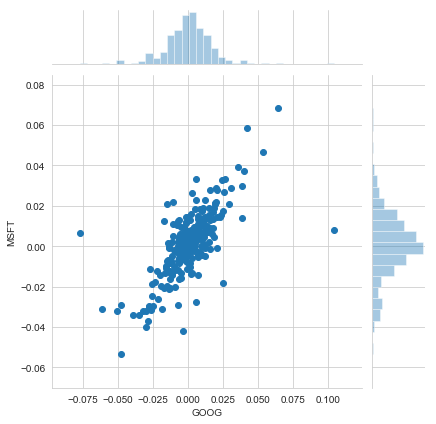

In [26]:
# 別の会社同士の相関
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')